Youtube data is taken for this analysis. USCOMMENT.CSV, containing the youtube data from US. Basically it is the comments that we are receiving in each youtube video and the number of likes and replies received in the same.

Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the data that we have using PANDAS READ_CSV

In [5]:
df = pd.read_csv('UScomments.csv',on_bad_lines = 'skip')

## we were having data errors, so we are just skipping the bad lines here
## error debugging

"""with open('UScomments.csv') as f:
  lines = f.readlines()
  print(lines[41589]) """

/var/folders/wx/llv42dz54_765_6h0pkyf5340000gq/T/ipykernel_48511/212634501.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv',on_bad_lines = 'skip')


"with open('UScomments.csv') as f:\n  lines = f.readlines()\n  print(lines[41589]) "

In [6]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
df.describe()

,video_id,comment_text,likes,replies
count,691400,691374,691400,691400
unique,2266,434075,1284,479
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,456894,525730


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


So, we have a total of 691400 rows of data, 4 columns all string (object as shown). However if we see in the sample data.

In [9]:
df.sample(6)

,video_id,comment_text,likes,replies
559625,tLv3X-aMyWQ,Dash berlin,0,0
254378,L00YWl8StuI,femenist should watch this,0,0
243689,AOQZNHueNQQ,Je t'aime ❤️,2,0
430659,R8NeB10INDo,Chapter 1 and 2’s render so great but this is ...,0,0
569526,P_X6hIyqUxA,Add me,0,0
423702,3QWQ4gN3j4E,Nice job liberals,0,0


In [10]:
df['likes'].unique()

array(['4', '3', '0', ..., 6365, 3014, 2292], shape=(1284,), dtype=object)

In [11]:
df['replies'].unique()

array(['0', '1', '500', '2', '261', '29', '180', '3', '4', '5', '77', '6',
       '14', '8', '11', '15', '7', '10', '156', '9', '13', '20', '16',
       '85', '520', '83', '22', '12', '24', '34', '240', '504', '32',
       '31', '196', '104', '50', '44', '138', '95', '21', '351', '105',
       '19', '166', '471', '266', '46', '136', '66', '286', '208', '259',
       '18', '112', '168', '28', '36', '88', '205', '78', '55', '164',
       '101', '39', '17', '86', '177', '40', '322', '291', '335', '495',
       '476', 'replies', '42', '159', '27', '478', '92', '503', '26',
       '25', '161', '242', '38', '371', '60', '354', '401', '33', '501',
       '49', '47', '224', '71', '54', '23', '65', '41', '80', '91', '311',
       '45', '230', '140', '529', '485', '246', '94', '412', '79', '486',
       '292', '391', '323', '376', '132', '488', '453', '264', '160',
       '169', '528', '282', '149', '466', '74', '499', '225', '370',
       '297', '329', '73', '175', '477', '181', '277', '301', '

we have video ID as mixed varchar data, comment_text as pure string value, Likes seems to be numeric value and replies as numeric values as well. However after viewing the unique values, some value are numeric eg. 157, whereas some as string e.g. '129'.

In [12]:
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')

In [13]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      691400 non-null  object 
 1   comment_text  691374 non-null  object 
 2   likes         691399 non-null  float64
 3   replies       691399 non-null  float64
dtypes: float64(2), object(2)
memory usage: 21.1+ MB


instead of int the data type has been converted to float, this might be due to NAN values, lets check them

In [15]:
df['replies'].isna().sum()

np.int64(1)

In [16]:
df['likes'].isna().sum()

np.int64(1)

In [17]:
df = df.dropna(subset=['replies'])

In [18]:
df['replies'].isna().sum()

np.int64(0)

In [19]:
df = df.dropna(subset=['likes'])

In [20]:
df['likes'].isna().sum()

np.int64(0)

so now we might be able to convert into Integer datatype

In [21]:
df['replies'] = df['replies'].astype(int)
df['likes'] = df['likes'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691399 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691399 non-null  object
 1   comment_text  691373 non-null  object
 2   likes         691399 non-null  int64 
 3   replies       691399 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 26.4+ MB


Now the data looks fine, all string values have object data type and integer values have integer data type

Now for duplicates and missing value check

In [23]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

26 rows have missing values, this is minimum number of rows, so lets drop the rows for now

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [26]:
df.duplicated().sum()

## 691,399 total number of rows, out of which 219,743 are duplicates
## we have no use of duplicate records. so lets remove them

np.int64(219743)

In [27]:
df = df.drop_duplicates(keep='last')

In [28]:
df.duplicated().sum()

np.int64(0)

Now the data has been cleaned, all the duplicates, missing values and data type has been cleaned and transformed.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471630 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      471630 non-null  object
 1   comment_text  471630 non-null  object
 2   likes         471630 non-null  int64 
 3   replies       471630 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 18.0+ MB


In [30]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


EDA - EXPLORATIVE DATA ANALYSIS

Our data has text data i.e. in form of comment. So doing sentimental analysis in this case will be benificial.

Sentiment analysis is a type of natural language processing (NLP) used to determine the emotional tone behind a piece of text — whether it's positive, negative, or neutral.

- python3 -m pip install textblob 

In [31]:
from textblob import TextBlob

For the comments, we need to know the sentiment of the comments. Like whether the comment is positive sentiment, negative or is neutral. For this we use textblob feature. This gives us a polarity value range from -1.0 to 1.0. Here, if the value is >0, then it is positive sentiment, if it is <0 then it is negative sentiment and if it =0 then is a neutral sentiment. for Example:

In [32]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [33]:
TextBlob("Logan Paul it's yo big day !! !! !!").sentiment.polarity

0.0

so here we got 0 polarity value meaning this is a neutral sentiment comment, nor positive nor negative. Likewise lets do this for all the comments available and store it into the dataset as a new field value.

In [34]:
polarity_value = [] # Defining an empty list to store polarity scores

for comment in df['comment_text']:
    try:
        polarity_value.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity_value.append(0)

So what these line of code does
1. Goes through each comment in the comment_text column of your DataFrame.
2. Tries to compute the polarity score (sentiment from -1 to 1) using TextBlob.
3. Appends the score to polarity_value.
4. If it encounters an error (like a missing value or invalid type), it adds a neutral score 0.

Now that we have the polarity values, lets add these into our dataset as a new feature.

In [35]:
df['polarity'] = polarity_value

In [36]:
df.sample(10)

,video_id,comment_text,likes,replies,polarity
417912,ruTB5jBGXsE,Ur gonna have to throw the whole house away,1,0,0.200000
439374,7k8PFMQQIxI,Goosebumps!! My favorite game series! I have t...,0,0,-0.012500
647000,dy5xLVx2NGY,If Jake Paul tweeted that hes falling from 125...,1,0,-0.625000
345943,ELQfBOJOds0,She's incredible! I'm in love with that lesbia...,0,0,0.988281
498490,Ca3rEOlAfpc,That's well posh,0,0,0.000000
308235,bd7IGZ6dulM,is moon his girlfriend or his mom,0,0,0.000000
637679,tLv3X-aMyWQ,good progressive remix,0,0,0.700000
126049,Z-LmHjkN2EU,"Oh man I love cocaine tho, that's to bad 😭",0,0,-0.100000
151542,ruRvc4huFkE,what a collab🔥🔥🔥🔥🔥🔥🔥,0,0,0.000000
52826,0501BTnbrxg,I wonder who NF is talking about,0,0,0.000000


Now we can see the polarity values.

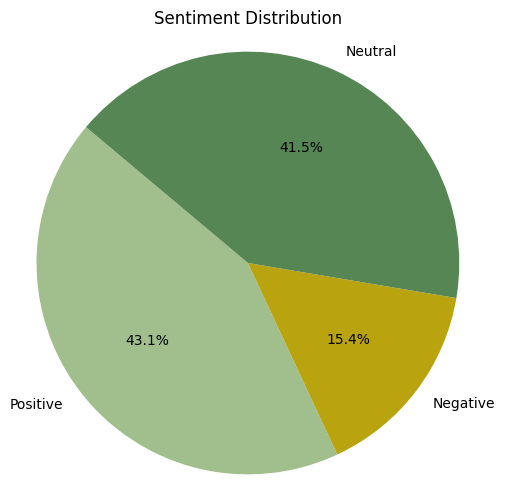

In [37]:
# Counting each sentiment category
positive_count = df[df['polarity'] > 0].shape[0]
negative_count = df[df['polarity'] < 0].shape[0]
neutral_count = df[df['polarity'] == 0].shape[0]

# Labels and values for the pie chart
labels = ['Positive','Negative','Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#a0bf8c','#b9a30e','#578655']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

The comments that we have has more of Positive and neutral sentiment comments. Negative Sentiment comments is minimal as compared to positive and neutral i.e.15%. Positive and neutral comments are some how on equal par.

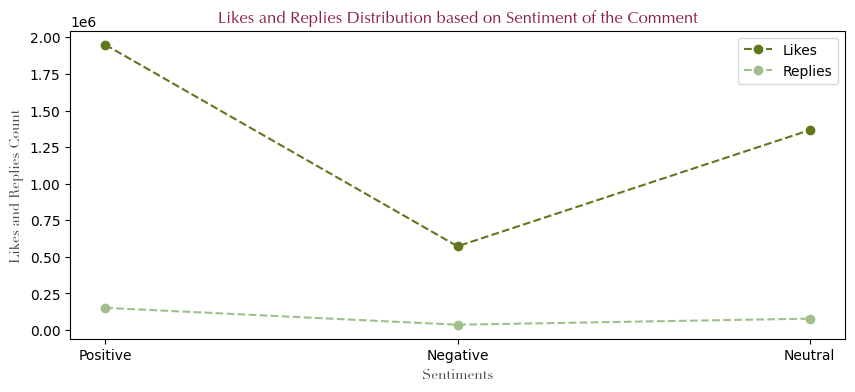

In [38]:
positive_likes = df[df['polarity'] > 0]['likes'].sum()
negative_likes = df[df['polarity'] < 0]['likes'].sum()
netutral_likes = df[df['polarity'] == 0]['likes'].sum()

positive_replies = df[df['polarity'] > 0]['replies'].sum()
negative_replies = df[df['polarity'] < 0]['replies'].sum()
netutral_replies = df[df['polarity'] == 0]['replies'].sum()

labels = ['Positive','Negative','Neutral']
likes = [positive_likes, negative_likes, netutral_likes]
replies = [positive_replies, negative_replies, netutral_replies]

font1 = {'family':'optima','color':'#8b1e3f'}
font2 = {'family':'didot','color':'#4b4e57'}

plt.figure(figsize = (10,4))

plt.title ("Likes and Replies Distribution based on Sentiment of the Comment",fontdict = font1)
plt.xlabel ("Sentiments", fontdict = font2)
plt.ylabel ("Likes and Replies Count",fontdict = font2)

plt.plot(labels,likes,color = '#5e781e', linestyle = '--', marker = 'o')
plt.plot(labels, replies, color = '#a0bf8c', linestyle = '--', marker = 'o')
plt.legend(['Likes','Replies'])
plt.show()

People are engaging more with positive sentiment comments. They are liking positive comments more. Neutral comments are also getting good attention. However people are not liking negative comments as much as they are doing positive and neutral comments. Though the replies in the comments are somehow similar for all sentiments, positive sentiment wins by a little margin.

Lets dive deeper. Lets analyze the text itself. Through Wordcloud analysis.
WordCloud analysis is a popular text visualization technique used to display the most frequent words in a body of text. It gives you a quick visual impression of which words appear most often — the more frequently a word appears, the larger and bolder it is shown in the cloud.  

- python3 -m pip install wordcloud 

In [39]:
from wordcloud import WordCloud, STOPWORDS

lets first create a string of all the comments combined, as our worldcloud only takes string value.

In [40]:
Comment_positive = ' '.join(df[df['polarity'] == 1]['comment_text'].astype(str)) ## lets only take the top positive comments
Comment_negative = ' '.join(df[df['polarity'] == -1]['comment_text'].astype(str)) ## lets only take the top negative comments
Comment_neutral = ' '.join(df[df['polarity'] == 0]['comment_text'].astype(str))

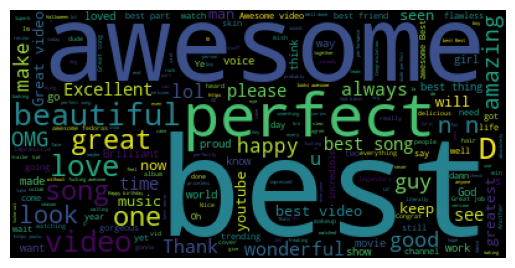

In [41]:
string1 = WordCloud(stopwords = set(STOPWORDS)).generate(Comment_positive)
## here set words are the words to be excluded, words having no meaning set(STOPWORDS)
plt.imshow(string1)
plt.axis('off')
plt.show()

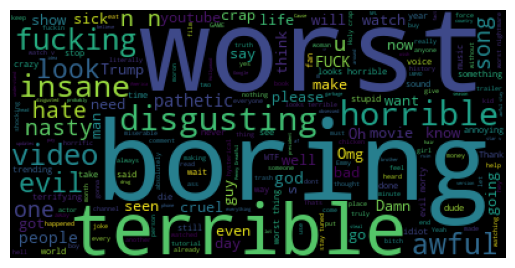

In [42]:
string2 = WordCloud(stopwords = set(STOPWORDS)).generate(Comment_negative)
plt.imshow(string2)
plt.axis('off')
plt.show()

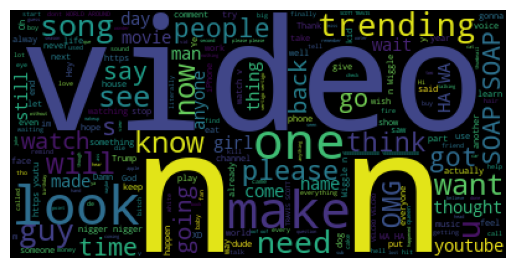

In [43]:
string3 = WordCloud(stopwords = set(STOPWORDS)).generate(Comment_neutral)
plt.imshow(string3)
plt.axis('off')
plt.show()

Now only letters our comments also included EMOJIS. Lets analyze these
- python3 -m pip install emoji==2.2.0 
Here 2.2.0 is the version

In [44]:
import emoji

In [45]:
emojis = [] ## defining a empty emoji list
for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emojis.append(char)

In [62]:
emojis[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

need to count how many times each emojis has been repeated in our dataset

In [47]:
from collections import Counter
counter_list = Counter(emojis).most_common(10)

In [48]:
counter_list

[('😂', 26956),
 ('😍', 21973),
 ('❤', 21943),
 ('🔥', 6246),
 ('😭', 6047),
 ('💖', 4206),
 ('😘', 4130),
 ('👏', 3934),
 ('👍', 3742),
 ('💕', 3711)]

so our emojis list has all the occurance of the emoji from our dataset including repeated ones from different comments or within the same comment. So using the counter is best option to count the occurance of each emojis.

- Our emojis list is a flat list of all emoji characters found, with duplicates.

- Counter uses that list to compute how often each emoji appears.

- This is efficient and avoids re-processing the DataFrame again.

the most common(10) gives you the top 10 frequent used emojis in the comments

In [57]:
import plotly.express as px

In [58]:
# Create DataFrame
emoji_df = pd.DataFrame(counter_list, columns=['Emoji', 'Count'])

# Create bar plot using Plotly
fig = px.bar(emoji_df, x='Emoji', y='Count', text='Count',
             title='Top 10 Emojis',
             labels={'Emoji': 'Emoji', 'Count': 'Frequency'})

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(tickfont=dict(size=24)),  # Make emojis large
    yaxis=dict(title='Count'),
    title_font_size=24,
    height=500
)

fig.show()

I didnt get a clear picture of the emojis while using both seaborn and matplotlib, so had to use plotly. Unlike Matplotlib, Plotly relies on our web browser to render graphics, which means it uses system/browser fonts — and modern browsers handle emojis very well. So this is a better choice.